False (256, 256)
是否原样恢复? True


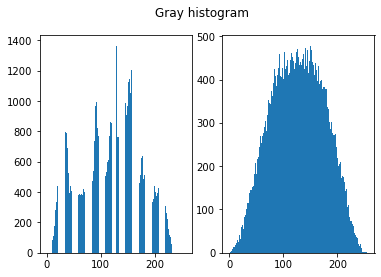

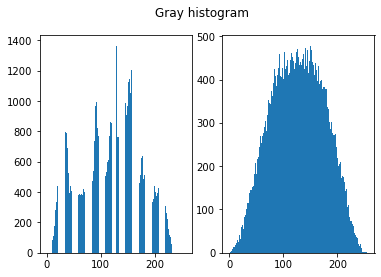

原始图片的熵 [6.632872]
加密图片的熵 [7.9905024]
(256, 256) (1000,) (1000,)


IndexError: index 1 is out of bounds for axis 1 with size 1

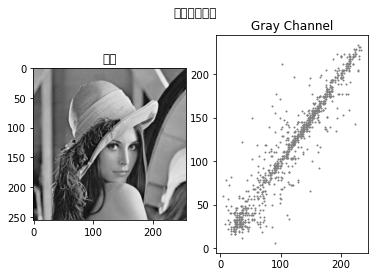

In [3]:
import cv2
from chaos_encrypt import logistic_decrypt, logistic_encrypt
from evaluation import get_img_corrlation, get_img_entropy, cmp_img_histogram, is_same_img

# 允许中文
plt.rcParams['font.sans-serif'] = ['SimHei']

if __name__ == "__main__":
    # 是否为rgb图片
    key_str = "20222"
    file_path = "../img/lena-gray.jpg"
    img = cv2.imread(file_path, 0)
    rgb = True if len(img.shape) == 3 else False
    print(rgb, img.shape)
    encrypted_path = "../img/enc.png"
    decrypted_path = "../img/dec.png"
    # logistic_encrypt(key_str, file_path, encrypted_path)
    # logistic_decrypt(key_str, encrypted_path, decrypted_path)

    # 检验图片解密是否正确
    print("是否原样恢复?", is_same_img(file_path, decrypted_path))
    
    # 评估加密性能——直方图，像素相关性，图像熵
    cmp_img_histogram(file_path, encrypted_path, rgb)
    cmp_img_histogram(file_path, encrypted_path, rgb=False)
    print("原始图片的熵",get_img_entropy(file_path, rgb))
    print("加密图片的熵",get_img_entropy(encrypted_path, rgb))
    get_img_corrlation(file_path, rgb)
    print(get_img_corrlation(encrypted_path, rgb))